## Data Importing

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
individual_household_electric_power_consumption = fetch_ucirepo(id=235)

# data (as pandas dataframes)
X = individual_household_electric_power_consumption.data.features
y = individual_household_electric_power_consumption.data.targets

# metadata
print(individual_household_electric_power_consumption.metadata)

# variable information
print(individual_household_electric_power_consumption.variables)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [4]:
# Step 3: Fetch the dataset
dataset = fetch_ucirepo(id=235)

# Inspect what was fetched
print("Dataset Features:", dataset.data.features)
print("Dataset Targets:", dataset.data.targets)


Dataset Features:                Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00                0.95                  0.00   
2075255  26/11/2010  20:59:00                0.94                  0.00   
2075256  26/11/2010  21:00:00                0.94                  0.00   
2075257  26/11/2010  21:01:00                0.93                  0.00   
2075258  26/11/2010  21:02:00                0.93                  0.00   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.8

In [5]:
import pandas as pd
import numpy as np

# Load from UCI directly (already in your dataset as DataFrame)
data = dataset.data.features

# Replace missing values marked as '?' and convert to numeric
for col in data.columns[2:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Combine Date and Time into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')
data.set_index('Datetime', inplace=True)

# Drop original Date and Time columns
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Check cleaned data
print(data.head())


                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:24:00                 4.22                   0.42   234.84   
2006-12-16 17:25:00                 5.36                   0.44   233.63   
2006-12-16 17:26:00                 5.37                   0.50   233.29   
2006-12-16 17:27:00                 5.39                   0.50   233.74   
2006-12-16 17:28:00                 3.67                   0.53   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:24:00             18.40            0.00            1.00   
2006-12-16 17:25:00             23.00            0.00            1.00   
2006-12-16 17:26:00             23.00            0.00            2.00   
2006-12-16 17:27:00             23.00            0.00            1.00   
2006-12-16 17:28:00          

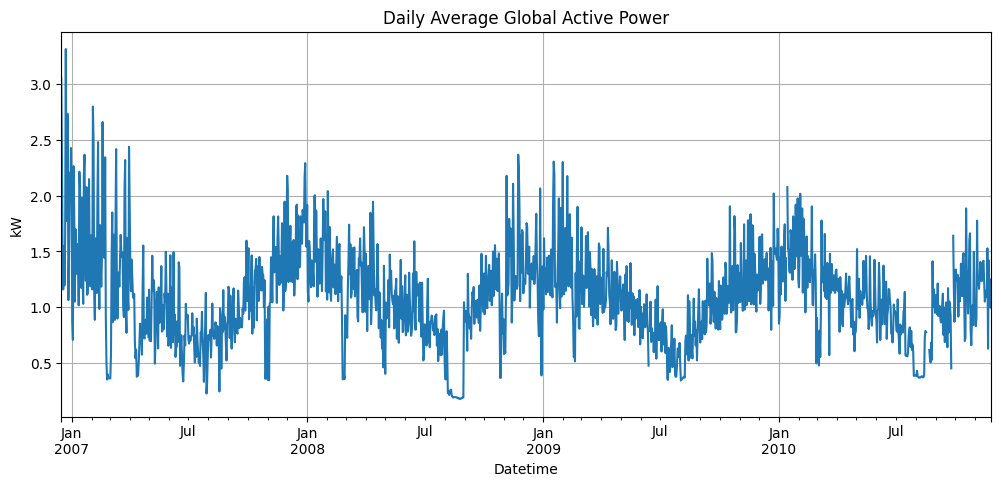

In [6]:
import matplotlib.pyplot as plt

# Daily average energy usage
daily_avg = data['Global_active_power'].resample('D').mean()
daily_avg.plot(title='Daily Average Global Active Power', figsize=(12, 5))
plt.ylabel('kW')
plt.grid()
plt.show()


In [7]:
# Define target and features
target = 'Global_active_power'
X = data.drop(columns=[target])
y = data[target]


In [8]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
from lazypredict.Supervised import LazyRegressor

# Initialize and run LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Show results
print("\n🔍 Model Performance Summary:")
print(models)


  0%|          | 0/42 [00:00<?, ?it/s]

: 